# Part II - (Ford Gobike)
## by Adham Kassem

## Investigation Overview
> This investigation studies the connection between gens and useage of modern transportation (bikes)
> Ford go bike is a company that provides renting bikes for a specific duration 
> this data contains trips from february 2019 in California San Francisco Bay area 


## Dataset Overview and Executive Summary

> #### The Data contains 171305 Trips with 11 Features
* Starting Time
* Ending Time
* Starting Station
* Ending station
* User Type
* Member gender
* Duration
* Distance
* Member Birth year
* Is it Holiday
* Is it Weekend


In [14]:
# import all packages and set plots to be embedded inline
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from geopy.distance import geodesic 
import holidays
import datetime

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("data.csv")

#importing holidays and weekends
us_holidays = holidays.US()

# Convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['is_holiday'] = df['start_time'].dt.date.apply(lambda x: x in us_holidays)
df['is_weekend'] = (pd.to_datetime(df['start_time']).dt.weekday>=5).astype(int)

# Calculate the distance between the start and end stations
def distance(start_coords, end_coords):
    return geodesic(start_coords, end_coords).kilometers

df['distance km'] = df.apply(lambda y: distance((y['start_station_latitude'], y['start_station_longitude']), (y['end_station_latitude'], y['end_station_longitude'])), axis=1)

# Calculate the duration of the trip in minutes
df["duration"]=df["duration_sec"].divide(60)
df.drop(columns=["duration_sec"],inplace=True)
df = df[df["member_gender"] != "Other"]
# Define generations based on birth year
def get_generation(year):
    if year >= 1997:
        return 'Gen Z'
    elif year >= 1981:
        return 'Millennials'
    elif year >= 1965:
        return 'Gen X'
    elif year >= 1946:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

df['generation'] = df['member_birth_year'].apply(get_generation)





## (Visualization 1)

> ### Rush hours by Generation

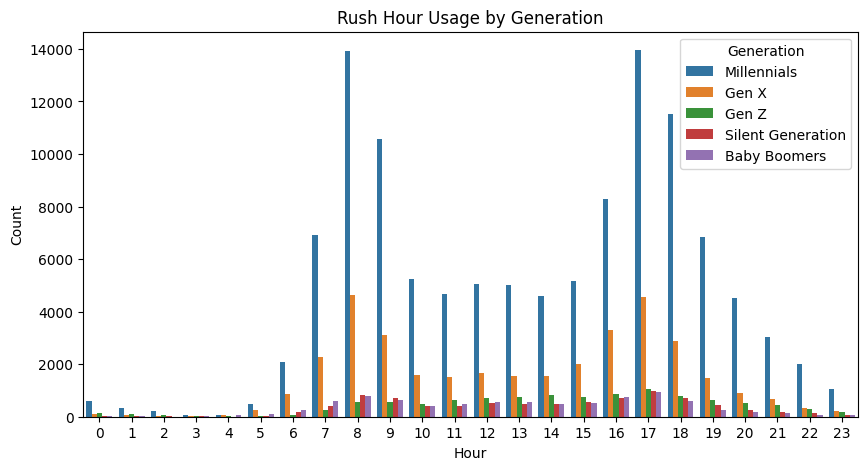

In [16]:
df["day"]=df["start_time"].dt.day_name()
df["hour"]=df["start_time"].dt.hour
df["month"]=df["start_time"].dt.month
df["day_number"]=df["start_time"].dt.day
df["year"]=df["start_time"].dt.year
plt.figure(figsize=(10,5))
plt.title("Rush Hour Usage by Generation")
sns.countplot(data=df, x="hour", hue="generation", order=range(0,24))
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title='Generation')
plt.show()


from this graph we can see millennials behavior at using bikes as they use it to go to work and to get home

## (Visualization 2)

> ### Rush hours on Days

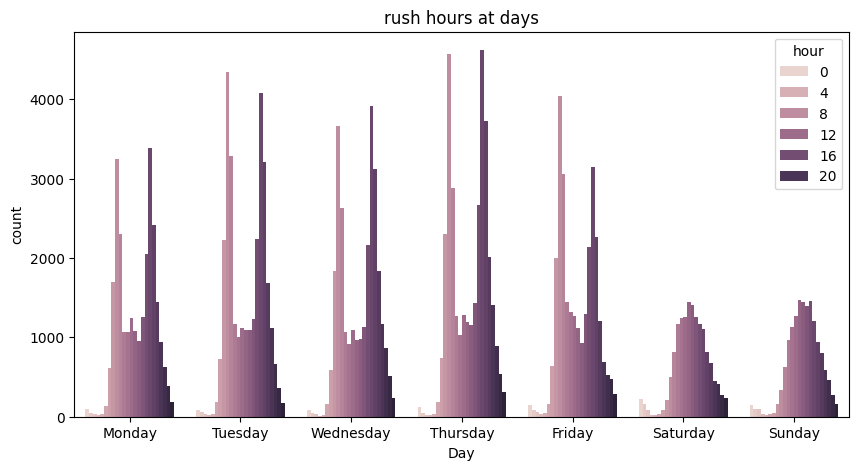

In [17]:
plt.figure(figsize=(10,5))
plt.title("rush hours at days")
sns.countplot(data=df, x="day", hue="hour", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Day")
plt.ylabel("count")
plt.legend(title="hour")
plt.show()

thursday has the most bike usage

## (Visualization 3)
### Trip Duration By User Type

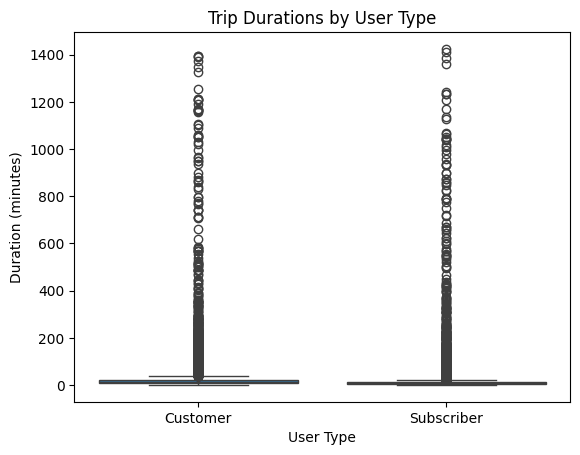

In [18]:
sns.boxplot(data= df , x="user_type" , y="duration")
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('Trip Durations by User Type')
plt.show()

Subscribers use bikes for longer durations

## (Visulization 4)

### Distribution of Trip Durations

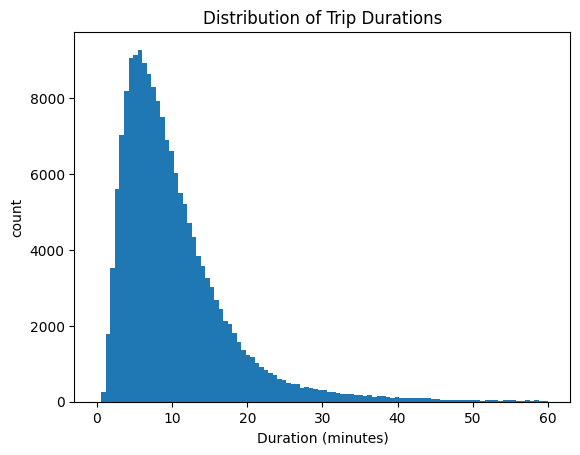

In [19]:
plt.hist(df['duration'], bins=100, range=(0, 60))
plt.xlabel('Duration (minutes)')
plt.ylabel('count')
plt.title('Distribution of Trip Durations')
plt.show()